In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176518
dtype: float64

In [6]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([0.17651769])

In [8]:
T = 1.0
t_intervals = 250
delta_t= T / t_intervals

iterations = 10000

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 *Z[t])

In [11]:
S

array([[ 83.05924988,  83.05924988,  83.05924988, ...,  83.05924988,
         83.05924988,  83.05924988],
       [ 82.32503776,  84.37674293,  83.99417268, ...,  83.83979093,
         84.12585518,  83.36584839],
       [ 82.44555865,  84.79474776,  84.4803816 , ...,  82.68299591,
         83.12156337,  84.35009881],
       ...,
       [ 75.30550379, 119.45538033,  83.31699456, ...,  74.50831768,
        107.59607997,  88.41050061],
       [ 74.3574003 , 118.9352543 ,  84.35102353, ...,  72.08560276,
        106.01706556,  89.07732815],
       [ 75.2036785 , 118.38232156,  83.79899962, ...,  72.64249581,
        107.50983082,  89.69495881]])

In [12]:
S.shape

(251, 10000)

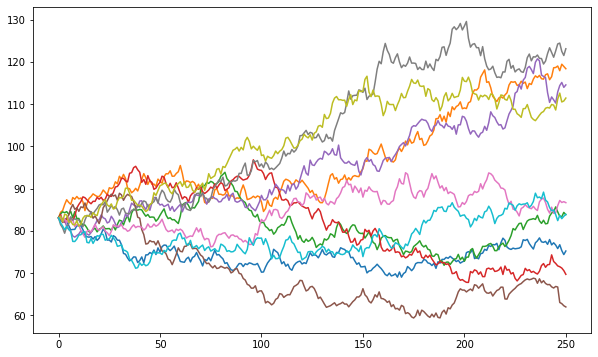

In [13]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);